In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# data
path = '../data/aftershock-region.csv'
data = pd.read_csv(path)
data = data.dropna()
print(data.head)
print(data.columns)

<bound method NDFrame.head of      magnitude  region  region_log
0          7.9   13000    4.113943
1          7.9   12700    4.103804
2          7.9   12600    4.100371
3          7.9   12600    4.100371
4          7.9   12900    4.110590
..         ...     ...         ...
184        5.1      16    1.204120
185        5.1      15    1.176091
186        5.1      15    1.176091
187        5.1      14    1.146128
188        5.1      14    1.146128

[189 rows x 3 columns]>
Index(['magnitude', 'region', 'region_log'], dtype='object')


In [4]:
x = data[['magnitude']]
y = data[['region']]
print(x.shape, y.shape)
print(type(x))

(189, 1) (189, 1)
<class 'pandas.core.frame.DataFrame'>


In [6]:
# seki
def FormulaSeki(M):
    return 10**(1.02*M - 4.01)
FormulaSeki_vec = np.vectorize(FormulaSeki)
y_expect_seki = FormulaSeki_vec(x)
print(f"seki공식에 따른 결정계수: {r2_score(y,y_expect_seki)}")
print(f"seki공식에 따른 평균 제곱 오차: {mean_squared_error(y,y_expect_seki)}")

seki공식에 따른 결정계수: 0.8874236918489445
seki공식에 따른 평균 제곱 오차: 1408442.0902708652


In [7]:
# smith
def FormulaSmith(M):
    return 10**(M-3.34)
FormulaSmith_vec = np.vectorize(FormulaSmith)

y_expect_smith = FormulaSmith_vec(x)
print(f"smith공식에 따른 결정계수: {r2_score(y,y_expect_smith)}")
print(f"smith공식에 따른 평균 제곱 오차: {mean_squared_error(y,y_expect_smith)}")

smith공식에 따른 결정계수: -2.2127103569143145
smith공식에 따른 평균 제곱 오차: 40194216.39281064


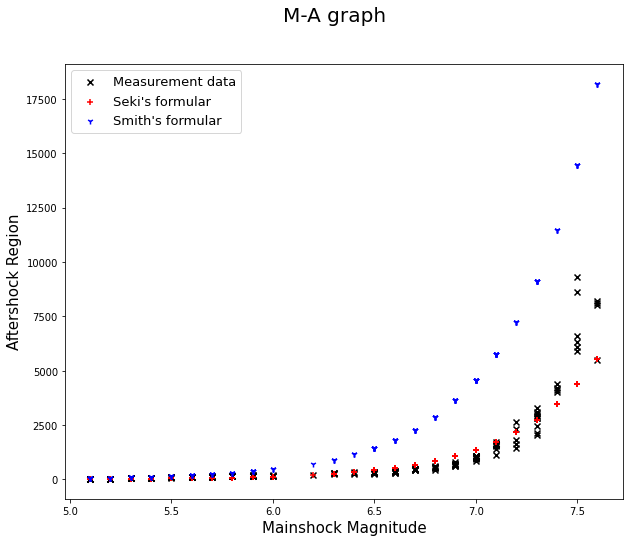

In [8]:
#graph
plt.figure(figsize=(10, 8))
plt.scatter(x[18:], y[18:], label='Measurement data', marker='x', c='black')

plt.scatter(x[18:],y_expect_seki[18:],label="Seki's formular",marker='+',c='red')
plt.scatter(x[18:],y_expect_smith[18:],label="Smith's formular",marker='1',c='blue')

plt.xlabel('Mainshock Magnitude', fontsize='15')
plt.ylabel('Aftershock Region', fontsize='15')
plt.suptitle('M-A graph',fontsize='20')
plt.legend(fontsize='13')
plt.show()